In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stat
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init(ip ='localhost', port = 54321)




Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment AdoptOpenJDK (build 11.0.10+9); OpenJDK 64-Bit Server VM AdoptOpenJDK (build 11.0.10+9, mixed mode)
  Starting server from /Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/z4/blr9pbks7g1gwx7yzstbjlgw0000gn/T/tmpixa0yq5u
  JVM stdout: /var/folders/z4/blr9pbks7g1gwx7yzstbjlgw0000gn/T/tmpixa0yq5u/h2o_simenvoldqvam_started_from_python.out
  JVM stderr: /var/folders/z4/blr9pbks7g1gwx7yzstbjlgw0000gn/T/tmpixa0yq5u/h2o_simenvoldqvam_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_simenvoldqvam_9j55l7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
#train_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_train_without_rev_features.csv")
#test_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_test_without_rev_features.csv")

#test_train = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_train.csv")
#test_test = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_test.csv")
#rev_labels = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/revenue_labels.csv")

#train_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_data.csv")
#test_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_data.csv") 

#test_dist = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_set_with_only_distance_feat.csv")
#train_dist = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_set_with_only_distance_feat.csv")

#train_clusters = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_set_100_clusters.csv")
#test_clusters = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_set_100_clusters.csv")

#stores_train_impuded = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_gk_impuded.csv")
#stores_test_impuded = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_test_impuded.csv")

#pd_stores_impuded = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_gk_impuded.csv")
#pd_test_impuded = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_test_impuded.csv")

#stores_with_gk_income = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_gk_income_train.csv")
#stores_with_gk_income_testset = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/stores_gk_income_test.csv")

train_df = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/new_train.csv")
test_df = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/new_test.csv")

grunnkrets = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_norway_stripped.csv")

grunnkrets_df = grunnkrets[['grunnkrets_id','municipality_name']]

train = train_df.merge(grunnkrets_df,how='left', on='grunnkrets_id')
test = test_df.merge(grunnkrets_df,how='left', on='grunnkrets_id')

train_df = train
test_df = test

train_df

,store_id,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,...,pt_box_distance_to_lv3_desc,pt_box_distance_to_lv4_desc,pt_box_grunnkrets_id_density,pt_box_t_district_density,pt_box_municipality_name_density,lv1,lv2,lv3,lv4,municipality_name
0,983540538-974187930-44774,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,...,0.815145,0.772654,-0.425471,0.606571,0.833192,1,1,1,0,Drammen
1,983540538-974187930-44774,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,...,0.815145,0.772654,-0.425471,0.606571,0.833192,1,1,1,0,Drammen
2,987074191-973117734-44755,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,...,-0.515914,-0.555738,0.562198,1.670229,1.587416,1,1,1,0,Oslo
3,987074191-973117734-44755,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,...,-0.515914,-0.555738,0.562198,1.670229,1.587416,1,1,1,0,Oslo
4,984890265-981157303-64491,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,...,1.831593,1.784193,0.220562,0.286544,-0.853802,1,1,1,0,Ringerike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25683,911721961-911764474-496764,GULATING ØLUTSALG STRØMMEN,2.8.11.2,Beer and soda shop,2310803,STØPERIVEIEN 6,59.946562,11.007659,GULATING GRUPPEN,Strømmen Storsenter,...,-0.936167,0.881749,1.383700,0.735564,0.470185,2,8,11,2,Skedsmo
25684,914337046-914343372-721294,DET GODE BRYGG,2.8.11.2,Beer and soda shop,11020113,VÅGSGATA 16,58.850261,5.735674,NaN,Bystasjonen,...,-0.318971,1.248906,1.279125,0.713610,-0.165527,2,8,11,2,Sandnes
25685,914337046-914343372-721294,DET GODE BRYGG,2.8.11.2,Beer and soda shop,11020113,VÅGSGATA 16,58.850261,5.735674,NaN,Bystasjonen,...,-0.318971,1.248906,1.279125,0.713610,-0.165527,2,8,11,2,Sandnes
25686,917494436-917551936-851089,TROMSØ BRYGGERIUTSALG AS,2.8.11.2,Beer and soda shop,19021302,PLANETVEGEN 10,69.670422,19.042659,NaN,NaN,...,1.055099,3.930414,0.958560,0.520497,0.485065,2,8,11,2,Tromsø


In [4]:
pt = PowerTransformer()
rev_transformed = pt.fit_transform(train_df[["revenue"]])
train_df["revenue"] = rev_transformed

In [5]:
#new avg revenue dataframe 
train_med_income = train_df[['store_id','lv1','revenue','municipality_name']]
level1_group = train_med_income.groupby(['municipality_name','lv1'])
median_rev = level1_group['revenue'].median()
#level1_group_2.median()
median_df = median_rev.to_frame()
median_df_new = median_df.rename(columns={'revenue':'median_rev'})



train_new = train_df.merge(median_df_new,how='left',on=('municipality_name','lv1'))

train_new

train_df = train_new



In [6]:
train = h2o.H2OFrame(train_df)
test = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:

x_train = train.drop([0], axis = 0)
y_test = test.drop([0], axis = 0)





In [8]:
x_train

store_id,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,pt_yeo_all_households,pt_yeo_singles,pt_yeo_couple_without_children,pt_yeo_couple_with_children,pt_yeo_other_households,pt_yeo_single_parent_with_children,pt_box_distance_to_mangler_viktighetsnivå,pt_box_distance_to_standard_holdeplass,pt_box_distance_to_lokalt_knutepunkt,pt_box_distance_to_nasjonalt_knutepunkt,pt_box_distance_to_regionalt_knutepunkt,pt_box_distance_to_annen_viktig_holdeplass,pt_box_distance_to_lv1_desc,pt_box_distance_to_lv2_desc,pt_box_distance_to_lv3_desc,pt_box_distance_to_lv4_desc,pt_box_grunnkrets_id_density,pt_box_t_district_density,pt_box_municipality_name_density,lv1,lv2,lv3,lv4,municipality_name,median_rev
983540538-974187930-44774,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6.0203e+06,BRAGERNES TORG 13,59.7431,10.2049,MCDONALDS,Magasinet Drammen,1.29724,-0.756455,-0.150764,0.882403,0.471944,-0.392788,-0.519425,0.725693,-0.281806,-0.788642,0.609792,-0.414774,-0.0192782,-0.15528,-0.536963,0.815145,0.772654,-0.425471,0.606571,0.833192,1,1,1,0,Drammen,0.254214
987074191-973117734-44755,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3.01031e+06,nan,59.9138,10.734,MCDONALDS,nan,1.479,-1.04425,0.602438,1.05017,0.245811,-0.917347,0.208998,-0.346802,0.50886,-1.68323,-0.974917,-1.65096,-0.1694,-1.95101,-0.768995,-0.515914,-0.555738,0.562198,1.67023,1.58742,1,1,1,0,Oslo,0.221377
987074191-973117734-44755,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3.01031e+06,nan,59.9138,10.734,MCDONALDS,nan,1.479,-1.04425,0.602438,1.05017,0.245811,-0.917347,0.208998,-0.346802,0.50886,-1.68323,-0.974917,-1.65096,-0.1694,-1.95101,-0.768995,-0.515914,-0.555738,0.562198,1.67023,1.58742,1,1,1,0,Oslo,0.221377
984890265-981157303-64491,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6.0501e+06,KONG RINGS GATE 1,60.1648,10.2547,BURGER KING,Kuben Hønefoss,1.22198,-1.37779,-1.26987,-0.403895,-0.682092,-0.686667,-0.846643,-1.85746,-0.35472,0.19155,0.690748,-0.4032,-0.558627,-0.0485883,-0.4359,1.83159,1.78419,0.220562,0.286544,-0.853802,1,1,1,0,Ringerike,0.0825582
984890265-981157303-64491,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6.0501e+06,KONG RINGS GATE 1,60.1648,10.2547,BURGER KING,Kuben Hønefoss,1.22198,-1.37779,-1.26987,-0.403895,-0.682092,-0.686667,-0.846643,-1.85746,-0.35472,0.19155,0.690748,-0.4032,-0.558627,-0.0485883,-0.4359,1.83159,1.78419,0.220562,0.286544,-0.853802,1,1,1,0,Ringerike,0.0825582
914057442-992924179-126912,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,1.80401e+07,STORGATA 12,67.2837,14.3798,BURGER KING,Glasshuspassasjen,0.827432,-0.81245,0.542514,-0.204873,-0.663141,-0.251084,-0.728369,0.727953,-0.371284,-0.0809321,-1.18233,-2.20557,1.84314,-0.36349,-0.736431,0.777371,0.735018,0.856468,0.783587,0.178579,1,1,1,0,Bodø,0.247401
914057442-992924179-126912,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,1.80401e+07,STORGATA 12,67.2837,14.3798,BURGER KING,Glasshuspassasjen,0.827432,-0.81245,0.542514,-0.204873,-0.663141,-0.251084,-0.728369,0.727953,-0.371284,-0.0809321,-1.18233,-2.20557,1.84314,-0.36349,-0.736431,0.777371,0.735018,0.856468,0.783587,0.178579,1,1,1,0,Bodø,0.247401
913018583-913063538-668469,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,1.60174e+07,nan,63.3581,10.3748,BURGER KING,Tillertorget,0.26248,1.65828,0.66658,0.344563,0.0810007,0.486103,0.457116,0.267773,-1.33424,-1.0867,0.6731,1.53833,-1.62668,-1.93869,-0.300597,-0.364151,-0.404034,0.562198,-0.19511,0.572502,1,1,1,0,Trondheim,0.400733
913018583-913063538-668469,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,1.60174e+07,nan,63.3581,10.3748,BURGER KING,Tillertorget,0.26248,1.65828,0.66658,0.344563,0.0810007,0.486103,0.457116,0.267773,-1.33424,-1.0867,0.6731,1.53833,-1.62668,-1.93869,-0.300597,-0.364151,-0.404034,0.562198,-0.19511,0.572502,1,1,1,0,Trondheim,0.400733
998035295-979540094-54657,BURGER KING STAVANGER,1.1.1.0,Hamburger res

In [9]:
x = x_train.columns
y = 'revenue'
x.remove(y)

aml = H2OAutoML(max_models=10, seed=1, exclude_algos=["deeplearning"])
aml.train(x=x, y=y, training_frame= x_train) 

AutoML progress: |███████████████████████████████████████

In [ ]:

lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20221111_162653,0.748267,0.559904,0.572044,nan,0.559904,751,0.033496,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20221111_162653,0.748823,0.560736,0.572778,nan,0.560736,594,0.020352,StackedEnsemble
GBM_1_AutoML_2_20221111_162653,0.755914,0.571405,0.577699,nan,0.571405,772,0.006652,GBM
GBM_2_AutoML_2_20221111_162653,0.756096,0.571682,0.576472,nan,0.571682,546,0.006183,GBM
GBM_3_AutoML_2_20221111_162653,0.756526,0.572331,0.577244,nan,0.572331,579,0.005576,GBM
GBM_4_AutoML_2_20221111_162653,0.761326,0.579618,0.581679,nan,0.579618,879,0.006353,GBM
DRF_1_AutoML_2_20221111_162653,0.764368,0.584259,0.581216,nan,0.584259,11883,0.016282,DRF
GLM_1_AutoML_2_20221111_162653,0.766041,0.586819,0.593923,nan,0.586819,871,0.00029,GLM
XGBoost_3_AutoML_2_20221111_162653,0.767523,0.589092,0.593284,nan,0.589092,1119,0.001175,XGBoost
XRT_1_AutoML_2_20221111_162653,0.772911,0.597392,0.607477,nan,0.597392,12463,0.016822,DRF


In [ ]:

m = h2o.get_model(lb[2,"model_id"])
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,chain_name,18978.078125,1.000000,0.490270
1,plaace_hierarchy_id,6992.136719,0.368432,0.180631
2,mall_name,4042.971924,0.213034,0.104444
3,sales_channel_name,2912.042480,0.153442,0.075228
4,address,615.299927,0.032422,0.015895
5,pt_box_distance_to_lv1_desc,523.111389,0.027564,0.013514
6,pt_box_distance_to_lv2_desc,451.954987,0.023815,0.011676
7,lv1,386.190887,0.020349,0.009977
8,pt_box_t_district_density,365.608459,0.019265,0.009445
9,pt_box_grunnkrets_id_density,270.414429,0.014249,0.006986


In [ ]:

best_model = aml.get_best_model()
#aml.leader.explain(stores_train)


In [ ]:
#model = h2o.get_model(lb[2,"model_id"])
prediction = aml.leader.predict(y_test)
df = y_test.cbind(prediction)
df = df.as_data_frame(use_pandas=True)
result = df.loc[:,("store_id", 'predict')]
submission = result.rename(columns = {"store_id": "id", "predict": "revenue"})
#submission.to_csv("Stacked_stores_impuded.csv", index = False)

submission






stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'plaace_hierarchy_id' has levels not trained on: ["1.5.1.0"]
  warnings.warn(w)
/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'sales_channel_name' has levels not trained on: ["Bowling alleys"]
  warnings.warn(w)
/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'address' has levels not trained on: ["17. MAI GATA 6", "4. STRØM TERRASSE 13", "A B AARSTENS GATE 4", "AAGAARDS PLASS 2", "AAGAARDVEIEN 177", "AARSTADGATEN 6", "AASGAARDEN 4", "ABEL MEYERS GATE 13", "ABELSBORG GATE 10", "ADMIRAL BØRRESENS VEI 6 E", ...4323 not listed..., "ØYEVOLLVEIEN 6", "ØYGARDEN 18", "ØYGARDSBAKKEN 13 A", "ØYJORDSVEIEN 1", "ØYRAGATA 9", "ØYRAPLASSEN 9", "ØYRO 17", "ØYRO 2", "ØYRO 39", "ØYVIND LAMBES VEI 6"]
  warnings.warn(w)
/Users/simenvoldq

,id,revenue
0,916789157-916823770-824309,0.483431
1,913341082-977479363-2948,-0.215605
2,889682582-889697172-28720,0.300715
3,997991699-998006945-417222,0.985483
4,914931487-815162862-756427,0.415219
...,...,...
8571,917323003-917383529-844309,0.215562
8572,917353379-917411824-845904,-0.141690
8573,917072302-917089248-833647,0.469618
8574,916960557-916993161-829908,-0.272925


In [ ]:
inverse_rev = pt.inverse_transform(submission[["revenue"]])
submission["predicted"] = inverse_rev
submit = submission.drop(["revenue"], axis = 1)
submit.to_csv("new_stores_transformed_with_median.csv", index = False)
submit
                        

,id,predicted
0,916789157-916823770-824309,5.959625
1,913341082-977479363-2948,2.508251
2,889682582-889697172-28720,4.744755
3,997991699-998006945-417222,11.503597
4,914931487-815162862-756427,5.470942
...,...,...
8571,917323003-917383529-844309,4.270991
8572,917353379-917411824-845904,2.750005
8573,917072302-917089248-833647,5.856968
8574,916960557-916993161-829908,2.334311


In [ ]:
#best_of = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/Arash/StackedEnsembleBestOfFamily.csv")
#best_of

In [ ]:
df_x = x_train.as_data_frame(use_pandas=True)

df_x2 = df_x.fillna(0)

df_x2.isna().sum()


store_id                                      0
store_name                                    0
plaace_hierarchy_id                           0
sales_channel_name                            0
grunnkrets_id                                 0
address                                       0
lat                                           0
lon                                           0
chain_name                                    0
mall_name                                     0
revenue                                       0
pt_yeo_all_households                         0
pt_yeo_singles                                0
pt_yeo_couple_without_children                0
pt_yeo_couple_with_children                   0
pt_yeo_other_households                       0
pt_yeo_single_parent_with_children            0
pt_box_distance_to_mangler_viktighetsnivå     0
pt_box_distance_to_standard_holdeplass        0
pt_box_distance_to_lokalt_knutepunkt          0
pt_box_distance_to_nasjonalt_knutepunkt 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e0e347520>,
      dtype=object)

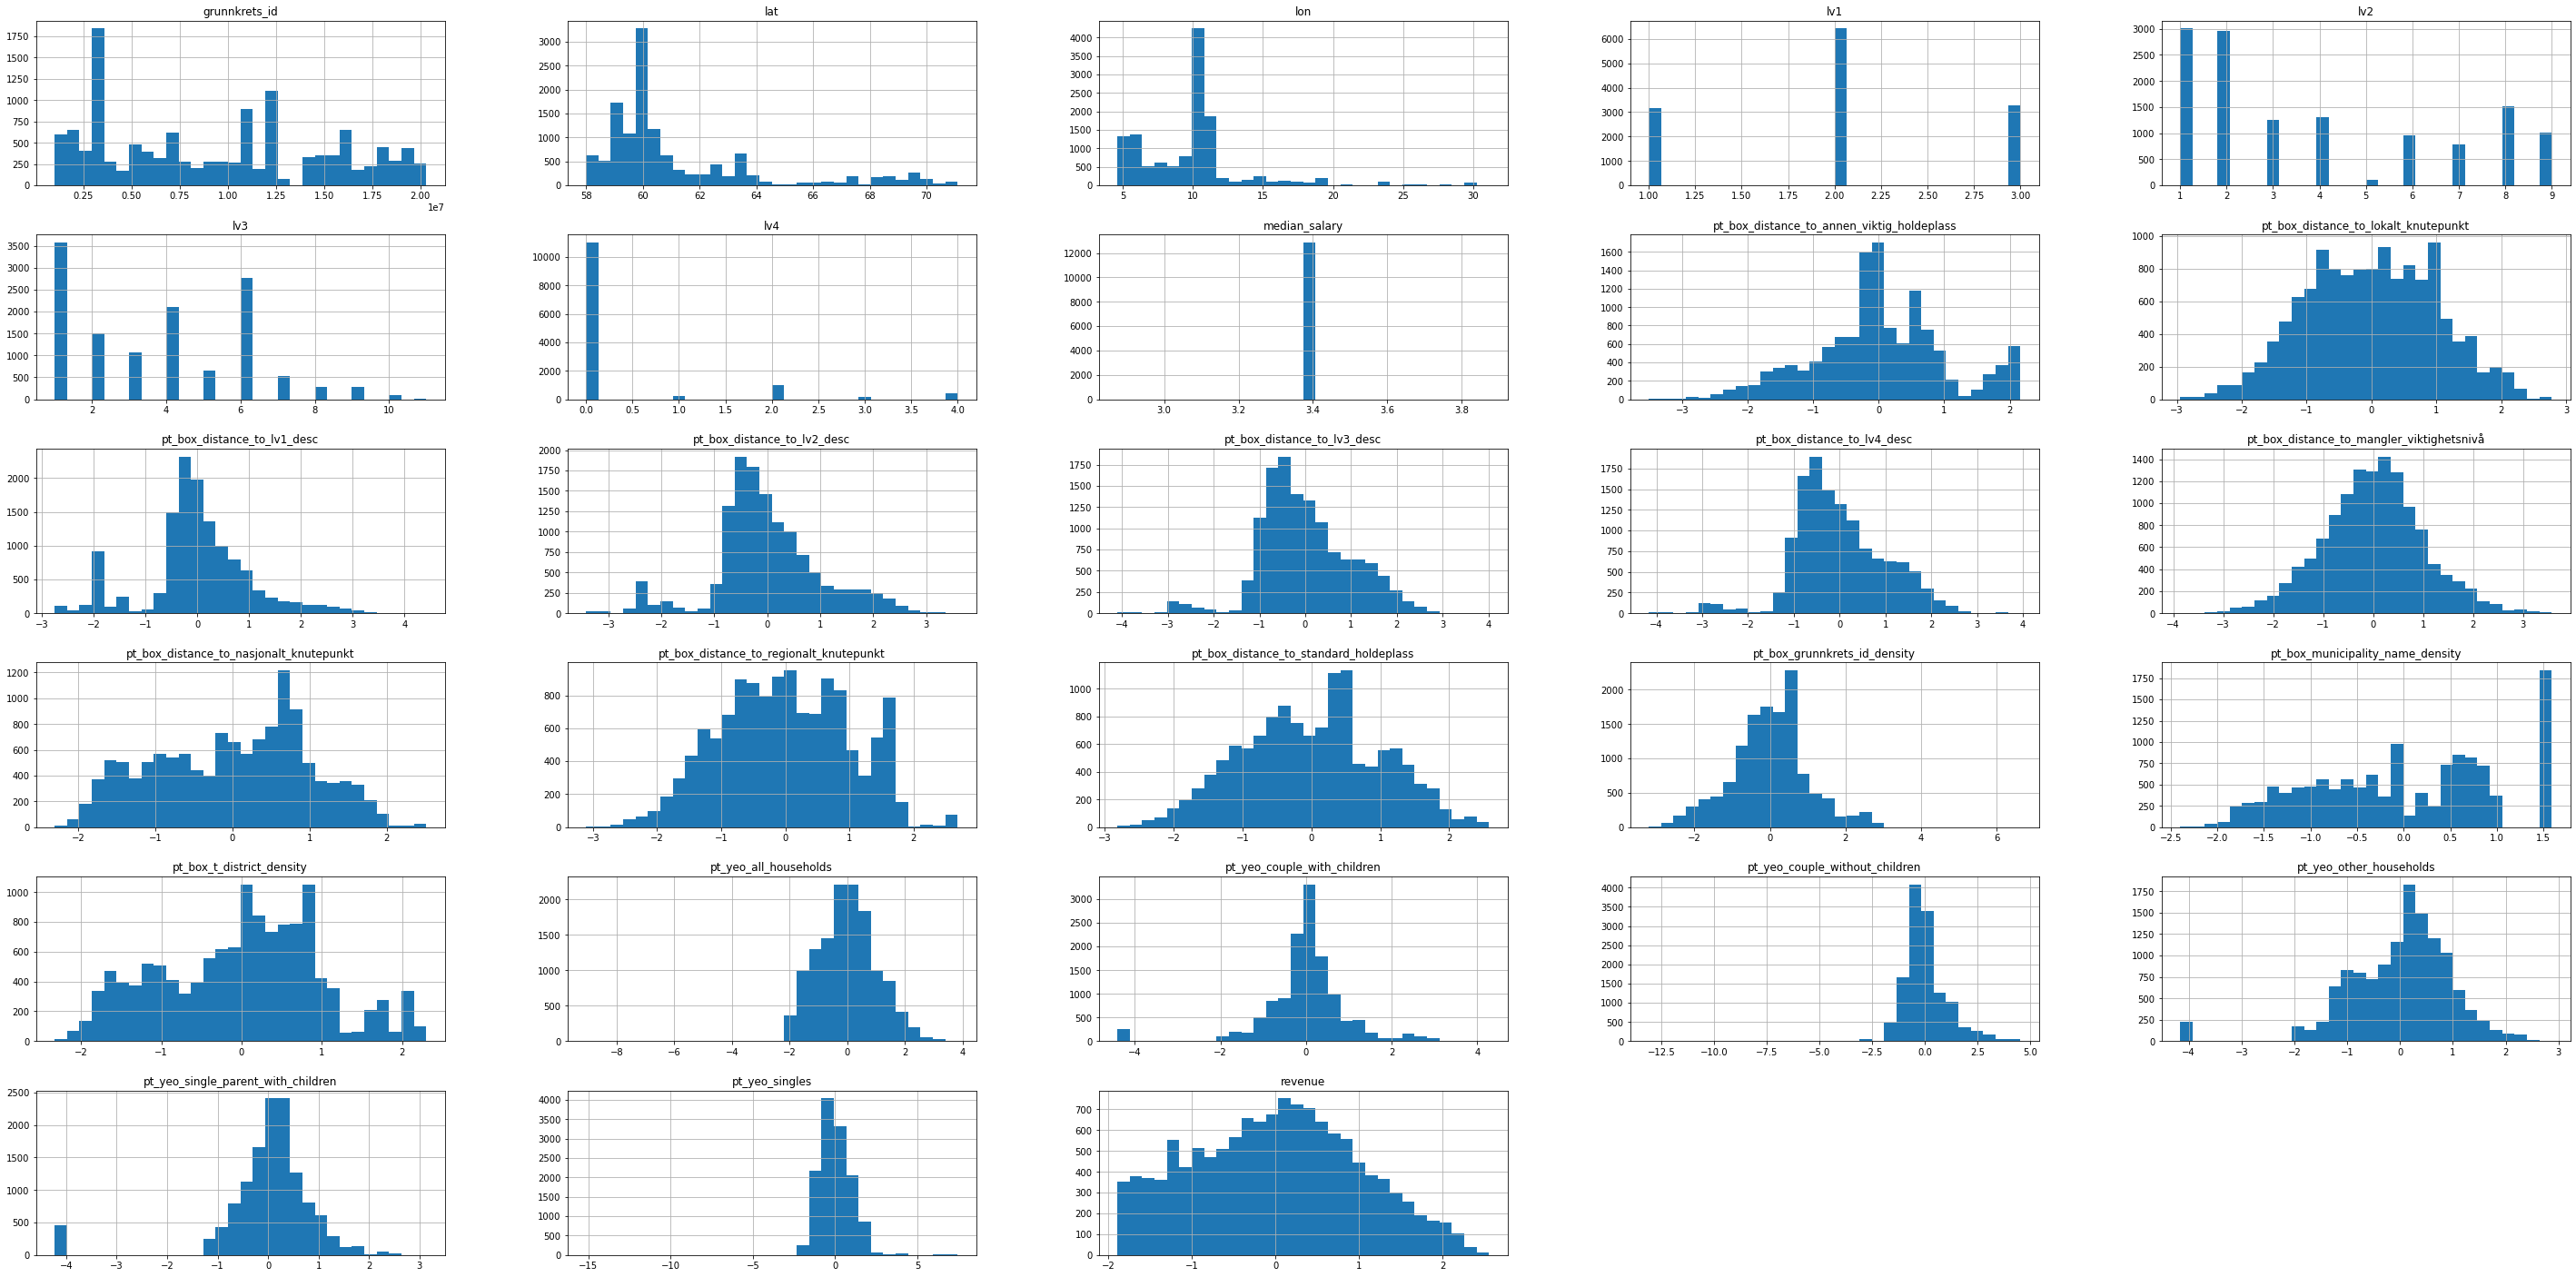

In [ ]:
df_x.hist(bins=30, figsize = (50,25))